<a href="https://colab.research.google.com/github/anuragal/yolov3_custom_dataset/blob/master/yolov3_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/anuragal/yolov3_custom_dataset.git

Cloning into 'yolov3_custom_dataset'...
remote: Enumerating objects: 1023, done.
remote: Counting objects: 100% (1023/1023), done.
remote: Compressing objects: 100% (589/589), done.
remote: Total 1023 (delta 4), reused 1015 (delta 2), pack-reused 0
Receiving objects: 100% (1023/1023), 17.16 MiB | 14.83 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [33]:
!git pull

Already up to date.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.1+cu101 _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15079MB, multi_processor_count=40)


In [34]:
ls

data/      predict/      runs/             utils/
detect.py  __pycache__/  test_batch0.png   weights/
LICENSE    README.md     test.py           yolov3_custom_dataset.ipynb
models.py  results.png   train_batch0.png
out_put/   results.txt   train.py


In [36]:
ls /content/gdrive/'My Drive'/yolo

out_put/  weights/


In [ ]:
cd yolov3_custom_dataset/

In [38]:
!ls

data	   predict	runs		  utils
detect.py  __pycache__	test_batch0.png   weights
LICENSE    README.md	test.py		  yolov3_custom_dataset.ipynb
models.py  results.png	train_batch0.png
out_put    results.txt	train.py


In [31]:
!python /content/yolov3_custom_dataset/train.py --data /content/yolov3_custom_dataset/data/customdata/custom.data --cache --epochs 300 --weights '/content/gdrive/My Drive/yolo/weights/yolov3-spp-ultralytics.pt' --cfg /content/yolov3_custom_dataset/data/cfg/yolov3-custom.cfg

Namespace(accumulate=4, adam=False, batch_size=16, bucket='', cache_images=True, cfg='/content/yolov3_custom_dataset/data/cfg/yolov3-custom.cfg', data='/content/yolov3_custom_dataset/data/customdata/custom.data', device='', epochs=300, evolve=False, img_size=[512], multi_scale=False, name='', nosave=False, notest=False, rect=False, resume=False, single_cls=False, weights='/content/gdrive/My Drive/yolo/weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

2020-07-05 12:12:53.556737: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (498 found, 0 missing, 2 empty, 0 duplicate, for 500 images): 100% 500/500 [00:00<00:00, 10094.35it/s]
Caching images (0.3GB): 100% 500/500 [00:01<00:00, 264.45it/s]


In [47]:
!python detect.py --conf-thres 0.5 --output '/content/gdrive/My Drive/yolo/out_put/' --weights '/content/yolov3_custom_dataset/weights/best.pt' --source '/content/yolov3_custom_dataset/predict/' --cfg /content/yolov3_custom_dataset/data/cfg/yolov3-custom.cfg

Namespace(agnostic_nms=False, augment=False, cfg='/content/yolov3_custom_dataset/data/cfg/yolov3-custom.cfg', classes=None, conf_thres=0.5, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/yolo/out_put/', save_txt=False, source='/content/yolov3_custom_dataset/predict/', view_img=False, weights='/content/yolov3_custom_dataset/weights/best.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15079MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/2929 /content/yolov3_custom_dataset/predict/image-001.png: 192x512 Done. (0.024s)
image 2/2929 /content/yolov3_custom_dataset/predict/image-002.png: 192x512 Done. (0.024s)
image 3/2929 /content/yolov3_custom_dataset/predict/image-003.png: 192x512 Done. (0.024s)
image 4/2929 /content/yolov3_custom_dataset/predict/image-004.png: 192x512 Done. (0.024s)
image 5/2929 /content/yolov3_custom_dataset/predict/

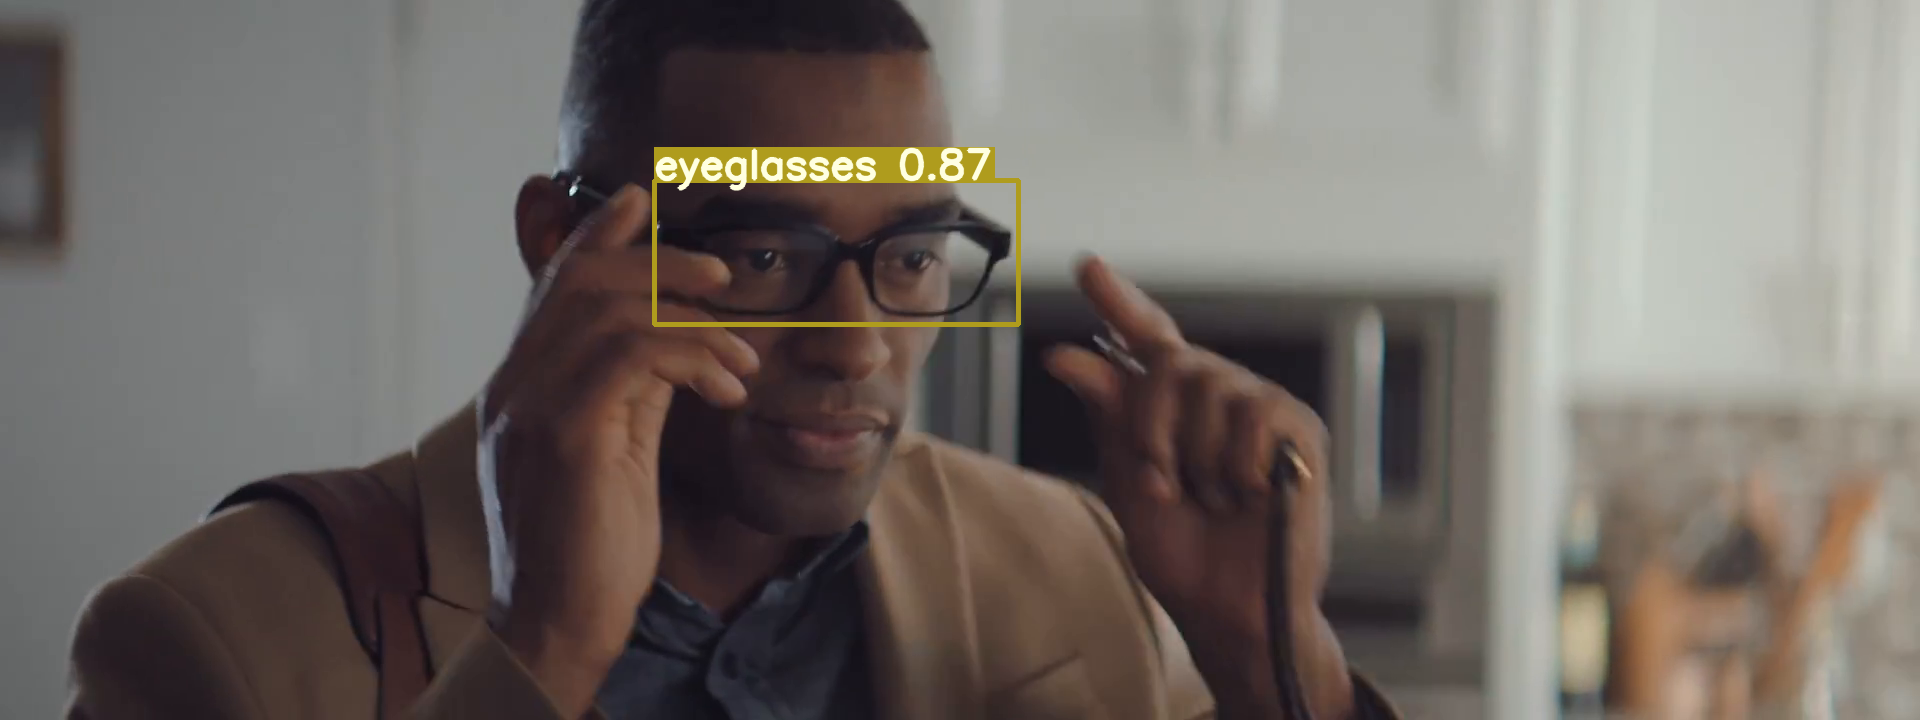

In [46]:
Image(filename='/content/gdrive/My Drive/yolo/out_put/image-067.png', width=600)